In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
import nltk
warnings.filterwarnings('ignore')


In [2]:
!pip install textaugment
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from textaugment import Wordnet
from tqdm import tqdm
from sklearn.utils import shuffle

     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 1.0MB 17.6MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp37-none-any.whl size=15737 sha256=a7a705714cff7bcb93488bcd06aeca8b3ff4081d6c99c0fd8ca4b5ecaa6ffbf6
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
Successfully built googletrans
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
# The labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1dzzVbgHphbCf7kvq9IKiIhwzmxPbuH4s")

In [4]:
df.head(10)

,loan_id,en_clean,defaulted
0,7779,She opened a colmado out of the side of her ho...,0
1,2777,(First Loan): Joffre continues to run his loc...,1
2,6007,"Dina Santana is the mother of two children, Ju...",0
3,76,"Rosemary is 50 years old, single, and has 6 ch...",1
4,4217,"Segundo has a shop where he sells animal feed,...",0
5,5077,"I am a single parent, mother of 4. I sell groc...",0
6,6033,Mariana Jose Serda owns a general store in Mag...,0
7,843,Mary is a mother of four children. One of the ...,1
8,4357,Wilson is seeking his second loan with Kiva an...,0
9,7007,Clara lives with her two children (ages: 20 an...,0


In [5]:
df.defaulted.value_counts()

0    3102
1    3036
Name: defaulted, dtype: int64

In [6]:
df = df.drop_duplicates('en_clean')
df.shape

(6129, 3)

Text Augmentation

In [7]:
def augment_text(df,samples=1200,pr=0.2):
    t = Wordnet()
    new_text=[]
    
    ##selecting the minority class samples
    df_n=df[df.defaulted==1].reset_index(drop=True)

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_n),samples)):
        
            text = df_n.iloc[i]['en_clean']
            augmented_text = t.augment(text)
            new_text.append(augmented_text)
    
    ## dataframe
    new=pd.DataFrame({'en_clean':new_text,'defaulted':1})
    df=shuffle(df.append(new).reset_index(drop=True))
    return df

In [8]:
df = augment_text(df)

100%|██████████| 1200/1200 [00:10<00:00, 110.55it/s]


In [9]:
df['en_clean'][4]

'Segundo has a shop where he sells animal feed, medicines and live poultry. He sells products for all types of animals ranging from pigs to ducks. Many people in his community raise these types of animals in their own backyards in order to resell them later for profits. He learned this business while being an assistant for his uncle for ten years. His uncle motivated him to start his own shop about 4 years ago and now he has a spot in his home where he makes his sales. Segundo needs this loan in order to invest in products at wholesale prices and quantities. He also wants to help his wife set up a part of their business as a small food market. They have been experimenting with the idea with some sales and they see potential for increased profits. Segundo and his wife are a young couple with one child. They have a humble home made out of cement and they want to continue making improvements to it.'

In [10]:
df.isnull().values.any()

True

In [11]:
import re
from bs4 import BeautifulSoup

In [12]:
#df.drop(columns=['loan_id'], inplace = True) #No need for data augmentation

In [13]:
# Remove HTTP tags
%time df['en_clean_Processed'] = df['en_clean'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df.head()

CPU times: user 717 ms, sys: 6.25 ms, total: 724 ms
Wall time: 722 ms


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,Fhlippe is a single parent the head of his hou...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana the leader of this group live 36 years o...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,Jenny is a single mother with 3 children She o...
190,5844.0,Iris is determined to start working on selling...,0,Iris is determined to start working on selling...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,Maria Florentino is a spirited young woman who...


In [14]:
#Lower Case
%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x: x.lower())
df.head()

CPU times: user 9.41 ms, sys: 34 µs, total: 9.44 ms
Wall time: 9.24 ms


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe is a single parent the head of his hou...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana the leader of this group live 36 years o...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny is a single mother with 3 children she o...
190,5844.0,Iris is determined to start working on selling...,0,iris is determined to start working on selling...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino is a spirited young woman who...


In [15]:
#Remove punctuations
%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df.head()

CPU times: user 94 ms, sys: 0 ns, total: 94 ms
Wall time: 93.5 ms


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe is a single parent the head of his hou...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana the leader of this group live 36 years o...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny is a single mother with 3 children she o...
190,5844.0,Iris is determined to start working on selling...,0,iris is determined to start working on selling...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino is a spirited young woman who...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7329 entries, 2094 to 4168
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             6129 non-null   float64
 1   en_clean            7329 non-null   object 
 2   defaulted           7329 non-null   int64  
 3   en_clean_Processed  7329 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 606.3+ KB


In [17]:
# See if there are null values
df.isnull().sum()

loan_id               1200
en_clean                 0
defaulted                0
en_clean_Processed       0
dtype: int64

In [18]:
# Drop the NaN values
#df.dropna(inplace=True)
#df.isnull().sum()

In [19]:
#Remove unicodes
%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df.head()

CPU times: user 125 ms, sys: 995 µs, total: 126 ms
Wall time: 126 ms


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe is a single parent the head of his hou...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana the leader of this group live 36 years o...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny is a single mother with 3 children she o...
190,5844.0,Iris is determined to start working on selling...,0,iris is determined to start working on selling...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino is a spirited young woman who...


In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [21]:
import nltk
nltk.download('stopwords')
# Remove stopwords
stop_words = stopwords.words('english')
%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
CPU times: user 2.13 s, sys: 5.56 ms, total: 2.14 s
Wall time: 2.13 s


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe single parent head household provides ...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana leader group live 36 years old proud mot...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny single mother 3 children owns small shop...
190,5844.0,Iris is determined to start working on selling...,0,iris determined start working selling various ...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino spirited young woman lives sm...


In [22]:
#nltk.download('wordnet')
  
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df.head()

CPU times: user 4.01 s, sys: 14 ms, total: 4.03 s
Wall time: 4.01 s


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe single parent head household provides ...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana leader group live 36 year old proud moth...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny single mother 3 child owns small shop se...
190,5844.0,Iris is determined to start working on selling...,0,iris determined start working selling various ...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino spirited young woman life sma...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7329 entries, 2094 to 4168
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             6129 non-null   float64
 1   en_clean            7329 non-null   object 
 2   defaulted           7329 non-null   int64  
 3   en_clean_Processed  7329 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 606.3+ KB


In [24]:
#Removing Stop words again after Lemmatize
%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df.head())
display(df.tail())

CPU times: user 1.6 s, sys: 4.22 ms, total: 1.6 s
Wall time: 1.6 s


,loan_id,en_clean,defaulted,en_clean_Processed
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe single parent head household provides ...
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana leader group live 36 year old proud moth...
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny single mother 3 child owns small shop se...
190,5844.0,Iris is determined to start working on selling...,0,iris determined start working selling various ...
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino spirited young woman life sma...


,loan_id,en_clean,defaulted,en_clean_Processed
4103,1226.0,"I am a married man, a father of 3. I sell belt...",1,married man father 3 sell belt living main bre...
3900,3739.0,Maria Ortiz who is a 49 year-old originally fr...,0,maria ortiz 49 year old originally caar ecuado...
2992,5651.0,"Jane is married with five children, all in pri...",0,jane married five child primary school underta...
6657,NaN,alejandrina give a small store in her house wh...,1,alejandrina give small store house trade basic...
4168,2366.0,Karen Chepngeno Rotich is 26 years old and mar...,1,karen chepngeno rotich 26 year old married thr...


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [26]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [27]:
#10 most common and 10 most rare words
common_words = get_n_words(df['en_clean_Processed'], "top", 15)
rare_words = get_n_words(df['en_clean_Processed'], "bottom", 500)

In [28]:
common_words

[('business', 14331),
 ('loan', 12691),
 ('child', 9078),
 ('year', 8862),
 ('school', 5534),
 ('sell', 5115),
 ('family', 4732),
 ('buy', 4648),
 ('old', 4469),
 ('group', 4152),
 ('able', 4107),
 ('woman', 3131),
 ('income', 3126),
 ('small', 3076),
 ('husband', 3021)]

In [29]:
rare_words

[('titled', 1),
 ('enlist', 1),
 ('localise', 1),
 ('ngoga', 1),
 ('torro', 1),
 ('aldofo', 1),
 ('imel', 1),
 ('nectanier', 1),
 ('getembe', 1),
 ('geraldino', 1),
 ('religion', 1),
 ('illustrates', 1),
 ('kedenyere', 1),
 ('eboya', 1),
 ('kadenyere', 1),
 ('117', 1),
 ('vuelven', 1),
 ('analyzes', 1),
 ('auko', 1),
 ('gloomy', 1),
 ('narrates', 1),
 ('oclock', 1),
 ('jaunt', 1),
 ('kirui', 1),
 ('worldwide', 1),
 ('nyakeru', 1),
 ('gichohi', 1),
 ('agoch', 1),
 ('persuades', 1),
 ('kalunda', 1),
 ('girlfriend', 1),
 ('munyambu', 1),
 ('reformed', 1),
 ('sculpture', 1),
 ('advantageously', 1),
 ('hello', 1),
 ('evangelic', 1),
 ('vaca', 1),
 ('cabra', 1),
 ('insect', 1),
 ('extermination', 1),
 ('cantuas', 1),
 ('sanitation', 1),
 ('oketch', 1),
 ('todo', 1),
 ('dubeau', 1),
 ('amauri', 1),
 ('ndonga', 1),
 ('sazon', 1),
 ('downplay', 1),
 ('mere', 1),
 ('outflow', 1),
 ('neck', 1),
 ('glendas', 1),
 ('cyrus', 1),
 ('warn', 1),
 ('in1996', 1),
 ('borderskenya', 1),
 ('shillings100', 1

In [30]:

#Removing common and rare words
#%time df['en_clean'] = df['en_clean'].map(lambda x : ' '.join([w for w in x.split() if w not in common_words]))
%time df['en_clean_Processed'] = df['en_clean_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in rare_words]))

CPU times: user 5.5 s, sys: 8.58 ms, total: 5.51 s
Wall time: 5.5 s


In [31]:
# BOW-TF Embedding

no_features = 1500
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

%time tpl_tf = tf_vectorizer.fit_transform(df['en_clean_Processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
display(df_tf.head())

CPU times: user 3.6 s, sys: 96 ms, total: 3.69 s
Wall time: 3.68 s


'Bow-TF :'

(7329, 1159)

,00,000,10,10 month,10 year,100,1000,11,12,12 month,1200,14,15,15 year,150,16,18,20,20 year,200,2002,2003,2004,2005,22,23,25,25 year,250,26,26 year,27,27 year,27 year old,28,29,30,30 year,30 year old,300,...,willing repay,willing repay loan,wish,within,within period,within period 12,without,woman,woman clothing,woman group,wood,work,work every,work every day,work hard,worked,worker,working,working hard,workshop,worth,would,would like,would like expand,year,year ago,year experience,year old,year old child,year old life,year old married,year old mother,year old single,year old two,year old woman,yet,young,young child,younger,youngest
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
df['en_clean_Processed'][0]

'opened colmado side house dominican republic colmado small neighborhood general store lucia sell several staple food item rice dried bean cooky cracker well razor toilet paper daily necessity business successful third ezperanza loan lucia business helped put two child college son age 25 daughter age 23 enthusiastic success business plan continue expand business much possible community life love convenience colmado neighborhood'

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
sid = SentimentIntensityAnalyzer()

In [35]:
df['scores'] = df['en_clean'].apply(lambda review: sid.polarity_scores(review))

In [36]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head(10)

,loan_id,en_clean,defaulted,en_clean_Processed,scores,compound
2094,7754.0,"Fhlippe is a single parent, the head of his ho...",0,fhlippe single parent head household provides ...,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.9356
6456,NaN,"juana, the leader of this group, live 36 years...",1,juana leader group live 36 year old proud moth...,"{'neg': 0.005, 'neu': 0.814, 'pos': 0.181, 'co...",0.9914
4931,3903.0,Jenny is a single mother with 3 children. She ...,0,jenny single mother 3 child owns small shop se...,"{'neg': 0.02, 'neu': 0.912, 'pos': 0.068, 'com...",0.7819
190,5844.0,Iris is determined to start working on selling...,0,iris determined start working selling various ...,"{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'comp...",0.7269
2240,7341.0,Maria Florentino is a spirited young woman who...,0,maria florentino spirited young woman life sma...,"{'neg': 0.006, 'neu': 0.884, 'pos': 0.11, 'com...",0.9698
3161,6293.0,This loan will go to start her cloth and beddi...,0,loan go start cloth bedding store purchase war...,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.8074
7132,NaN,"alice ondonga, is a widow, mature 43, with two...",1,alice ondonga widow mature 43 two child grade ...,"{'neg': 0.015, 'neu': 0.892, 'pos': 0.093, 'co...",0.9360
2673,7421.0,Carmen Isidra Lantigua is the coordinator of a...,0,carmen isidra lantigua coordinator group calle...,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",0.9612
6700,NaN,mrs. dumez has comprise selling clothing and a...,1,mr dumez comprise selling clothing accessory l...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.9136
2525,116.0,JOSEPH MACHARIA MBUGUA 42 years of age married...,1,joseph macharia mbugua 42 year age married fiv...,"{'neg': 0.039, 'neu': 0.907, 'pos': 0.055, 'co...",0.7717


In [37]:
df['comp_score'] = df['compound'].apply(lambda c: 1 if c >=0 else 0)

In [38]:
df[df['comp_score']==0]

,loan_id,en_clean,defaulted,en_clean_Processed,scores,compound,comp_score
3052,3830.0,Grace was born 49 years ago. She is married an...,0,grace born 49 year ago married couple blessed ...,"{'neg': 0.121, 'neu': 0.792, 'pos': 0.087, 'co...",-0.4149,0
4981,4011.0,Teofila Bone has owned her business for two ye...,0,teofila bone owned business two year sell hous...,"{'neg': 0.026, 'neu': 0.974, 'pos': 0.0, 'comp...",-0.3506,0
175,82.0,Terry is mother of 3 children who are grownup....,1,terry mother 3 child grownup source informatio...,"{'neg': 0.097, 'neu': 0.862, 'pos': 0.041, 'co...",-0.8360,0
714,153.0,"PAUL OBWAKA is 38 years old, married and a fat...",1,paul obwaka 38 year old married father two lif...,"{'neg': 0.039, 'neu': 0.94, 'pos': 0.021, 'com...",-0.6621,0
6209,NaN,"i am widow, mother of 3. my husband pall of hi...",1,widow mother 3 husband pall hiv aid main bread...,"{'neg': 0.036, 'neu': 0.964, 'pos': 0.0, 'comp...",-0.1027,0
...,...,...,...,...,...,...,...
3259,3439.0,Elizabeth is single and an active member of Ka...,0,elizabeth single active member kandisi wisdom ...,"{'neg': 0.114, 'neu': 0.811, 'pos': 0.075, 'co...",-0.5859,0
7251,NaN,i am 28 years old. i lead a small kiosk betray...,1,28 year old lead small kiosk betray petty hous...,"{'neg': 0.18, 'neu': 0.751, 'pos': 0.069, 'com...",-0.5719,0
5094,7290.0,She lives in a very poor community surrounded ...,0,life poor community surrounded sugar cane rura...,"{'neg': 0.039, 'neu': 0.928, 'pos': 0.032, 'co...",-0.1513,0
793,1583.0,Loice Njoki Chege is a 35-year-old single moth...,1,loice njoki chege 35 year old single mother tw...,"{'neg': 0.06, 'neu': 0.912, 'pos': 0.028, 'com...",-0.6068,0


In [39]:
import spacy
from functools import partial
def spacy_tokenize(text, nlp):
    return [x.orth_ for x in nlp(text)]

nlp = spacy.load('en', disable=['ner',  'tagger'])
tok = partial(spacy_tokenize, nlp=nlp)

In [40]:
df[['en_clean_Processed','compound']]

,en_clean_Processed,compound
2094,fhlippe single parent head household provides ...,0.9356
6456,juana leader group live 36 year old proud moth...,0.9914
4931,jenny single mother 3 child owns small shop se...,0.7819
190,iris determined start working selling various ...,0.7269
2240,maria florentino spirited young woman life sma...,0.9698
...,...,...
4103,married man father 3 sell belt living main bre...,0.7713
3900,maria ortiz 49 year old originally caar ecuado...,0.5859
2992,jane married five child primary school underta...,0.8689
6657,alejandrina give small store house trade basic...,0.8126


In [41]:
no_features = 1200
vectorizer = CountVectorizer( tokenizer=tok, min_df=2, max_features=no_features,stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['en_clean_Processed']).toarray()
y = df['defaulted']

In [42]:
# no_features = 1500
# tfidf_vectorizer = TfidfVectorizer(tokenizer=tok, min_df=2, max_df=0.5, max_features=no_features,  ngram_range=[1,2],stop_words='english',
#                                    analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b')
# X = tfidf_vectorizer.fit_transform(df['en_clean_Processed']).toarray()
# y = df['defaulted']

In [43]:
# compu_score = np.array(df['compound']).reshape(-1,1)
# X = np.append(X,compu_score,1)
# X.shape

In [44]:
X.shape[1]

1200

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, train_size = 0.80)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5863, 1200), (1466, 1200), (5863,), (1466,))

In [46]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# #X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
# test = SelectKBest(score_func=chi2, k='all')
# fit = test.fit(X, y)
# X_new=test.fit_transform(X, y)

In [47]:
# X_new.shape

In [60]:
# X_train, X_val, y_train, y_val = train_test_split(X_new, y, random_state=42, train_size = 0.70)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
history = model.fit(X_train,y_train, epochs=30)

Epoch 1/30
184/184 [==============================] - 1s 3ms/step - loss: 0.6185 - accuracy: 0.6221
Epoch 2/30
184/184 [==============================] - 1s 3ms/step - loss: 0.3601 - accuracy: 0.8533
Epoch 3/30
184/184 [==============================] - 1s 3ms/step - loss: 0.2428 - accuracy: 0.9099
Epoch 4/30
184/184 [==============================] - 1s 3ms/step - loss: 0.1890 - accuracy: 0.9279
Epoch 5/30
184/184 [==============================] - 1s 3ms/step - loss: 0.1351 - accuracy: 0.9535
Epoch 6/30
184/184 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.9689
Epoch 7/30
184/184 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9773
Epoch 8/30
184/184 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9810
Epoch 9/30
184/184 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9861
Epoch 10/30
184/184 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9869

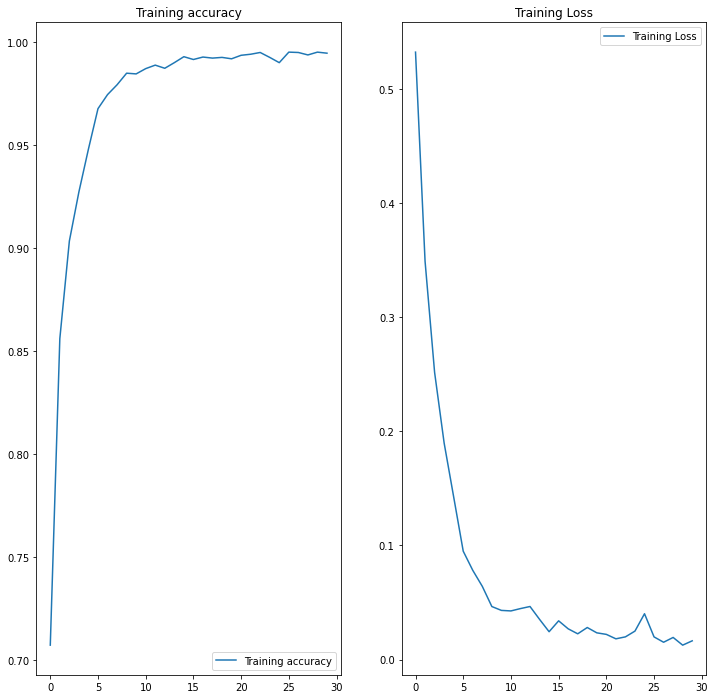

In [63]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
#plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [64]:
y_val_pred = (model.predict(X_val) > 0.5).astype('int')
y_val_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_true = y_val, y_pred = y_val_pred))
print(classification_report(y_true = y_val, y_pred = y_val_pred))

[[503  93]
 [ 80 790]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       596
           1       0.89      0.91      0.90       870

    accuracy                           0.88      1466
   macro avg       0.88      0.88      0.88      1466
weighted avg       0.88      0.88      0.88      1466



In [66]:
# Read in the unlabeled testing data (for the Kaggle competition)
df_test = pd.read_csv("https://drive.google.com/uc?export=download&id=1EVWfyqQOd_W2uTKrr4JTD2iFrEZHoOHT")

In [67]:
X_test= vectorizer.fit_transform(df_test['en_clean']).toarray()
X_test.shape

(664, 1200)

In [68]:
# Use our pipeline to make predictions; then output predictions to a CSV file.

pred_test = (model.predict(X_test)).astype('int')

my_submission = pd.DataFrame({'id': df_test['loan_id'], 'predicted': pred_test[:, 0]})
my_submission.head()

# This command will save the file to the local cloud instance; it will be deleted
# as soon as this Notebooks session ends.
my_submission.to_csv('my_submission.csv', index=False)

In [69]:
# Download predictions file to your local computer

from google.colab import files
files.download('my_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>